In [1]:
# Import raw data from Excel
import pandas as pd
filepath = 'C:/Users/PXY/Desktop/Orange_week.xlsx';
sheetname = 'main'
df = pd.read_excel ( filepath, sheet_name = sheetname );
print (df)

     Year    Week  Cases  Rainfalls  No.of Raindays  Max. temperature  \
0    2010   week1    NaN        NaN             NaN               NaN   
1    2010   week2    NaN        NaN             NaN               NaN   
2    2010   week3    NaN        NaN             NaN               NaN   
3    2010   week4    NaN      286.0            22.0         32.883871   
4    2010   week5    NaN        NaN             NaN               NaN   
5    2010   week6    NaN        NaN             NaN               NaN   
6    2010   week7    NaN        NaN             NaN               NaN   
7    2010   week8   36.0      241.8            11.0         34.385714   
8    2010   week9   65.0        NaN             NaN               NaN   
9    2010  week10   46.0        NaN             NaN               NaN   
10   2010  week11   31.0        NaN             NaN               NaN   
11   2010  week12   27.0      191.8            14.0         34.338710   
12   2010  week13   40.0        NaN             NaN

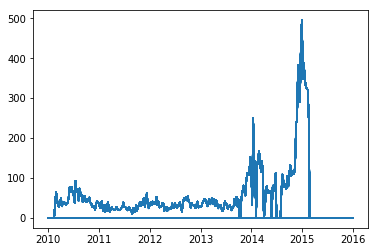

In [25]:
# Data preprocessing

# Set NaN to 0.0 for Cases & Fatality
df['Cases'].fillna( 0, inplace = True )
df['Fatality'].fillna(0, inplace = True )

# Set others to first found values
df['Rainfalls'].ffill( inplace = True );
df['Max. temperature'].ffill( inplace = True );
df['Min. temperature'].ffill( inplace = True );
df['Mean temp'].ffill( inplace = True );

# Ffill doesn't fill in the first three NaN, thus need to do another bfill
df['Rainfalls'].bfill( inplace = True );
df['Max. temperature'].bfill( inplace = True );
df['Min. temperature'].bfill( inplace = True );
df['Mean temp'].bfill( inplace = True );

# Add new column
import datetime 
date = []
for index,row in df.iterrows():
    row['Date'] = datetime.datetime.strptime( str( row['Year'])+ row['Week'] + "-1", "%Yweek%W-%w")
    date.append( row['Date'])

df['Date'] = date

# Verify if all the anomalies are gone and new column added succesfully
df.dtypes

# Show the data in chart
import matplotlib
import matplotlib.pyplot as plt
plt.figure()
dates = matplotlib.dates.date2num(df['Date'])
plt.plot_date(dates, df['Cases'], '-')



In [28]:
# Normalizing data
# This step is really useful on improving model performance
import sklearn
from sklearn.preprocessing import StandardScaler
cols_to_norm = [ 'Rainfalls','Max. temperature','Min. temperature','Mean temp']
#df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

# Create predictors
predictors = df.drop(['HasCase','FatalityRate'], axis=1).values
n_cols = predictors.shape[1] 
  
# Create target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(df.HasCase)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, 
                                                    test_size=0.3 )

In [36]:
# Build and train the model
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import numpy as py
# fix random seed for reproducibility
seed = 7
py.random.seed(seed)
cvscores = []

# define 10-fold cross validation test harness
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for train, test in kfold.split(predictors, target):
    
  # Input layer
  model = keras.Sequential() 
  model.add(layers.Dense(100, activation='relu', input_shape = (n_cols,))) 
  model.add(layers.Dense(100, activation='relu')) 

  # Output layer
  model.add(layers.Dense(1, activation='sigmoid')) 

  # Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

  # Fit the model
  model.fit(predictors[train], target[train], epochs=40,  verbose=False )
  # evaluate the model
  scores = model.evaluate(predictors[test], target[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (py.mean(cvscores), py.std(cvscores)))

[  0   1   3   4   5   6   7   8  11  12  13  16  17  19  20  21  22  23
  24  25  26  27  28  30  32  33  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  58  60  61  62  63  65
  66  68  70  71  74  75  76  77  78  79  80  82  83  84  86  88  90  92
  94  96  97  98  99 100 102 103 106 107 109 110 111 112 113 114 115 116
 117 118 119 120 122 123 124 125 126 127 130 131 132 133 134 135 136 137
 138 142 143 144 147 148 149 150 151 152 153 154 156 157 158 159 161 162
 164 165 166 167 168 170 171 174 175 176 177 178 179 181 182 183 184 185
 186 187 188 189 190 191 192 193 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 224
 225 226 228 229 230 232 233 235 237 238 239 240 242 243 244 245 247 248
 249 250 251 252 254 255 256 257 258 260 261 262 263 264 265 266 269 270
 272 273 274 275 276 278 282 283 284 287 288 289 290 291 292 293 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 30